<a href="https://colab.research.google.com/github/muzammilunipi/DataMiningProject/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install matplotlib --upgrade matplotlib
!pip install seaborn --upgrade seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 15.1 MB/s 
     |████████████████████████████████| 960 kB 57.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 13.5 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [1]:
#Libaries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing the dataset
df=pd.read_csv("/content/drive/Shareddrives/UnipiSharedDrive/ravdess_features.csv")

In [4]:
#Displaying the first 5 records
df.head(5)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [5]:
#Displaying the last 5 records
df.tail(5)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
2447,audio-only,speech,calm,strong,Kids are talking by the door,1st,23.0,M,1,2,...,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,1,2,...,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,audio-only,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,1,2,...,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,audio-only,speech,surprised,normal,Kids are talking by the door,1st,NaN,M,1,2,...,0.001565,1.0,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966
2451,audio-only,NaN,neutral,normal,Dogs are sitting by the door,2nd,23.0,M,1,2,...,0.000000,1.0,-1.257666,-0.237757,6.342640e-07,0.010001,-0.081512,0.103027,12.973181,1.032081


In [6]:
df.columns

Index(['modality', 'vocal_channel', 'emotion', 'emotional_intensity',
       'statement', 'repetition', 'actor', 'sex', 'channels', 'sample_width',
       'frame_rate', 'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_max', 'stft_kur',
       'stft_skew', 'mean', 'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Data Analysis

In [8]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [9]:
#No of Rows/records and cols/attributes
df.shape

(2452, 38)

**1) Checking the vocal_channel Variable**

In [10]:
#Checking the unique values inside the modality variable using .unqiue() function
df["modality"].unique()

array(['audio-only'], dtype=object)

Since, there is only one value present in this variable which is not useful at for. Therefore, neither any analysis nor anything else would be done for this variable and it would be dropped at the later stage.

**1) Checking the vocal_channel Variable**

In [11]:
#Checking the unique values inside the modality variable using .unqiue() function
df["vocal_channel"].unique()

array(['speech', nan, 'song'], dtype=object)

There are three two different values inside this variable: Speech and Song, and there are some missing values as well. Let's look for their distribution using the countplot

In [12]:
# Writing a function to output count plot 
def countplot_sns(attribute,title):
  _=plt.figure(figsize=(12,7))
  ax = sns.countplot(x=attribute,
                     order=attribute.value_counts(ascending=False).index);
  abs_values = attribute.value_counts(ascending=False)
  rel_values = attribute.value_counts(ascending=False, normalize=True).values * 100
  lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

  _=ax.bar_label(container=ax.containers[0], labels=lbls)
  _=plt.title(title)

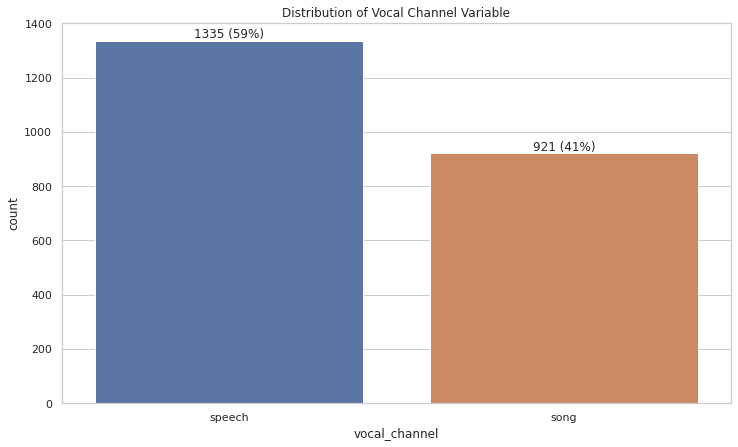

In [13]:
#

# _=plt.figure(figsize=(12,7))
# ax = sns.countplot(x=df["vocal_channel"],
#                    order=df["vocal_channel"].value_counts(ascending=False).index);
        
# abs_values = df["vocal_channel"].value_counts(ascending=False)
# rel_values = df["vocal_channel"].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

# _=ax.bar_label(container=ax.containers[0], labels=lbls)
# _=plt.title("Distribution of Vocal Channel")


countplot_sns(df["vocal_channel"],"Distribution of Vocal Channel Variable")

In [14]:
#Let's find the percentage of Null Values inside this variable
nan_percent_vocal=(df["vocal_channel"].isna().sum())/df.shape[0]
print("The percentage of Null Values inside the variable : ", round(nan_percent_vocal,2)*100 , "%")

The percentage of Null Values inside the variable :  8.0 %


There are only 8 percent of null values inside this variables. In the later stages, something would be done about this: either filling it up with some value(s) or dropping it

**1) Checking the emotion Variable**

In [15]:
df["emotion"].unique()

array(['fearful', 'angry', 'happy', 'surprised', 'neutral', 'calm', 'sad',
       'disgust'], dtype=object)

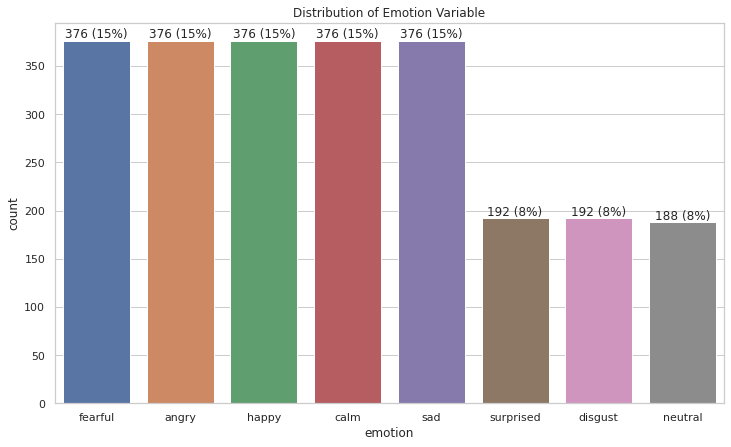

In [ ]:
#

countplot_sns(df["emotion"],"Distribution of Emotion Variable")

In [ ]:
df["emotion"].isna().sum()

0

In [ ]:
#Using .query() function to check whether the emotion variable has blank or hyphens which could be equivalent to Nulls
df.query("emotion == ' ' or emotion == '-'")

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew


**1) Checking the emotional intensity Variable**

In [ ]:
df["emotional_intensity"].unique()

array(['normal', 'strong'], dtype=object)

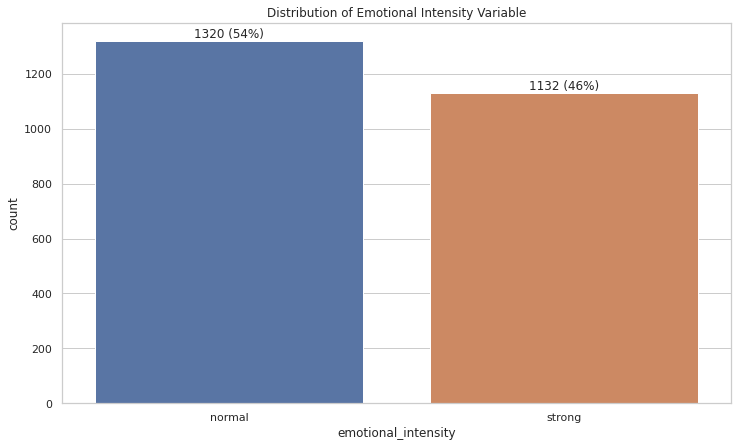

In [ ]:
#

countplot_sns(df["emotional_intensity"],"Distribution of Emotional Intensity Variable")

In [ ]:
df["emotional_intensity"].isna().sum()

0

**Checking the Statement Variable**

In [ ]:
df["statement"].unique()

array(['Dogs are sitting by the door', 'Kids are talking by the door'],
      dtype=object)

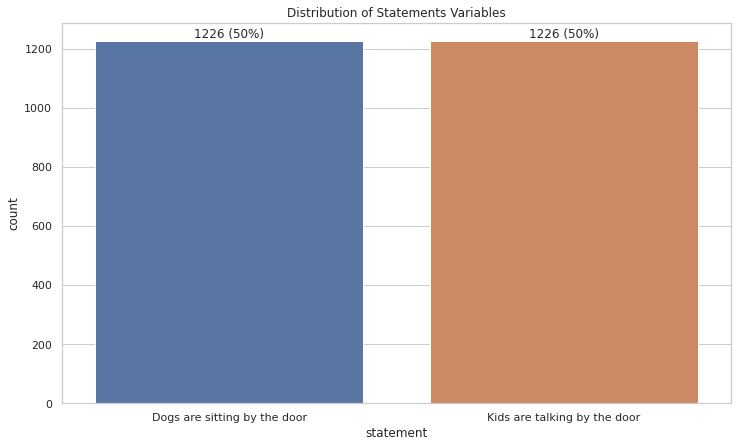

In [ ]:
#

countplot_sns(df["statement"],"Distribution of Statements Variables")

**Checking the repitition Variable**

In [ ]:
df["repetition"].unique()

array(['2nd', '1st'], dtype=object)

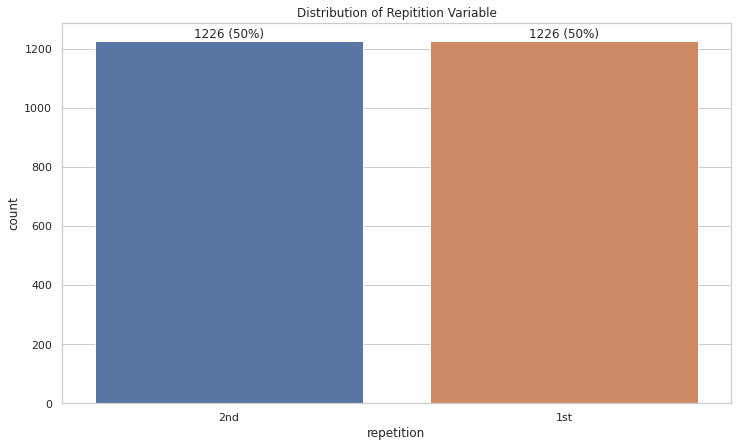

In [ ]:
#

countplot_sns(df["repetition"],"Distribution of Repitition Variable")

There is equal distribution of both the classes in this variable.